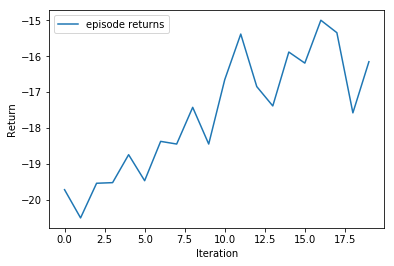

In [14]:
# @title Necessary imports and globals.
%matplotlib inline

import numpy as np
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags

BASE_PATH = './'  # @param
GAMES = ['cars']  # @param

import matplotlib.pyplot as plt

for game in GAMES:
  # Use our provided colab utils to load this log file. The second returned 
  
  #raw_data, _ = colab_utils.load_statistics(
  #    'LOGS/logs'.format(game), verbose=False)
  raw_data, _ = colab_utils.load_statistics(
      'LOGS/logs'.format(game), verbose=False)
  summarized_data = colab_utils.summarize_data(
      raw_data, ['train_episode_returns'])
  plt.plot(summarized_data['train_episode_returns'], label='episode returns')
  plt.plot()
  plt.xlabel('Iteration')
  plt.ylabel('Return')
  plt.legend()
  plt.show()